In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import re

In [2]:
cfg = None
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)["Lab_1"]

In [3]:
def is_digit(string: str) -> bool:
    if string.isdigit():
       return True
    else:
        try:
            float(string)
            return True
        except ValueError:
            return False

def split_by_spaces(line: str, not_used: list[int]) -> list[float]:
    line: list[str] = line.split(" ")
    line = [s.strip() for s in line.copy() if s != '' and is_digit(s)]
    line = [item for idx, item in enumerate(line) if idx not in not_used]
    return [float(s) for s in line]

def load_dataset(path: str,
                 columns: list[str],
                 not_used: list[int] = [],
                 ) -> pd.DataFrame:
    
    with open(path, 'r') as f:
        lines = f.readlines()

    data = [split_by_spaces(line, not_used) for line in lines]
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Dataset “Airport” 

загрузка датасета

In [4]:
columns = ['Scheduled departures',
           'Performed departures',
           'Enplaned passengers',
           'Enplaned revenue tons of freight',
           'Enplaned revenue tons of mail']

df = load_dataset(cfg['airport'], columns)


In [5]:
df.head(10)

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,285693.0,288803.0,22665665.0,165668.76,93039.48
1,73300.0,74048.0,4420425.0,18041.52,19722.93
2,114153.0,115524.0,9549585.0,127815.09,29785.72
3,120210.0,121798.0,7076954.0,36242.84,15399.46
4,322430.0,332338.0,25636383.0,300463.80,140359.38
5,266737.0,269665.0,22899267.0,142660.95,86706.76
6,39481.0,40196.0,2882836.0,2216.70,242.87
7,154067.0,156293.0,11961839.0,67345.75,38043.73
8,6828.0,7162.0,362655.0,258.08,0.00
9,134929.0,137565.0,9903078.0,42831.24,32429.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Scheduled departures              134 non-null    float64
 1   Performed departures              134 non-null    float64
 2   Enplaned passengers               134 non-null    float64
 3   Enplaned revenue tons of freight  134 non-null    float64
 4   Enplaned revenue tons of mail     134 non-null    float64
dtypes: float64(5)
memory usage: 5.4 KB


Построение гистограмм относительных частот, учитывая длину интервалов

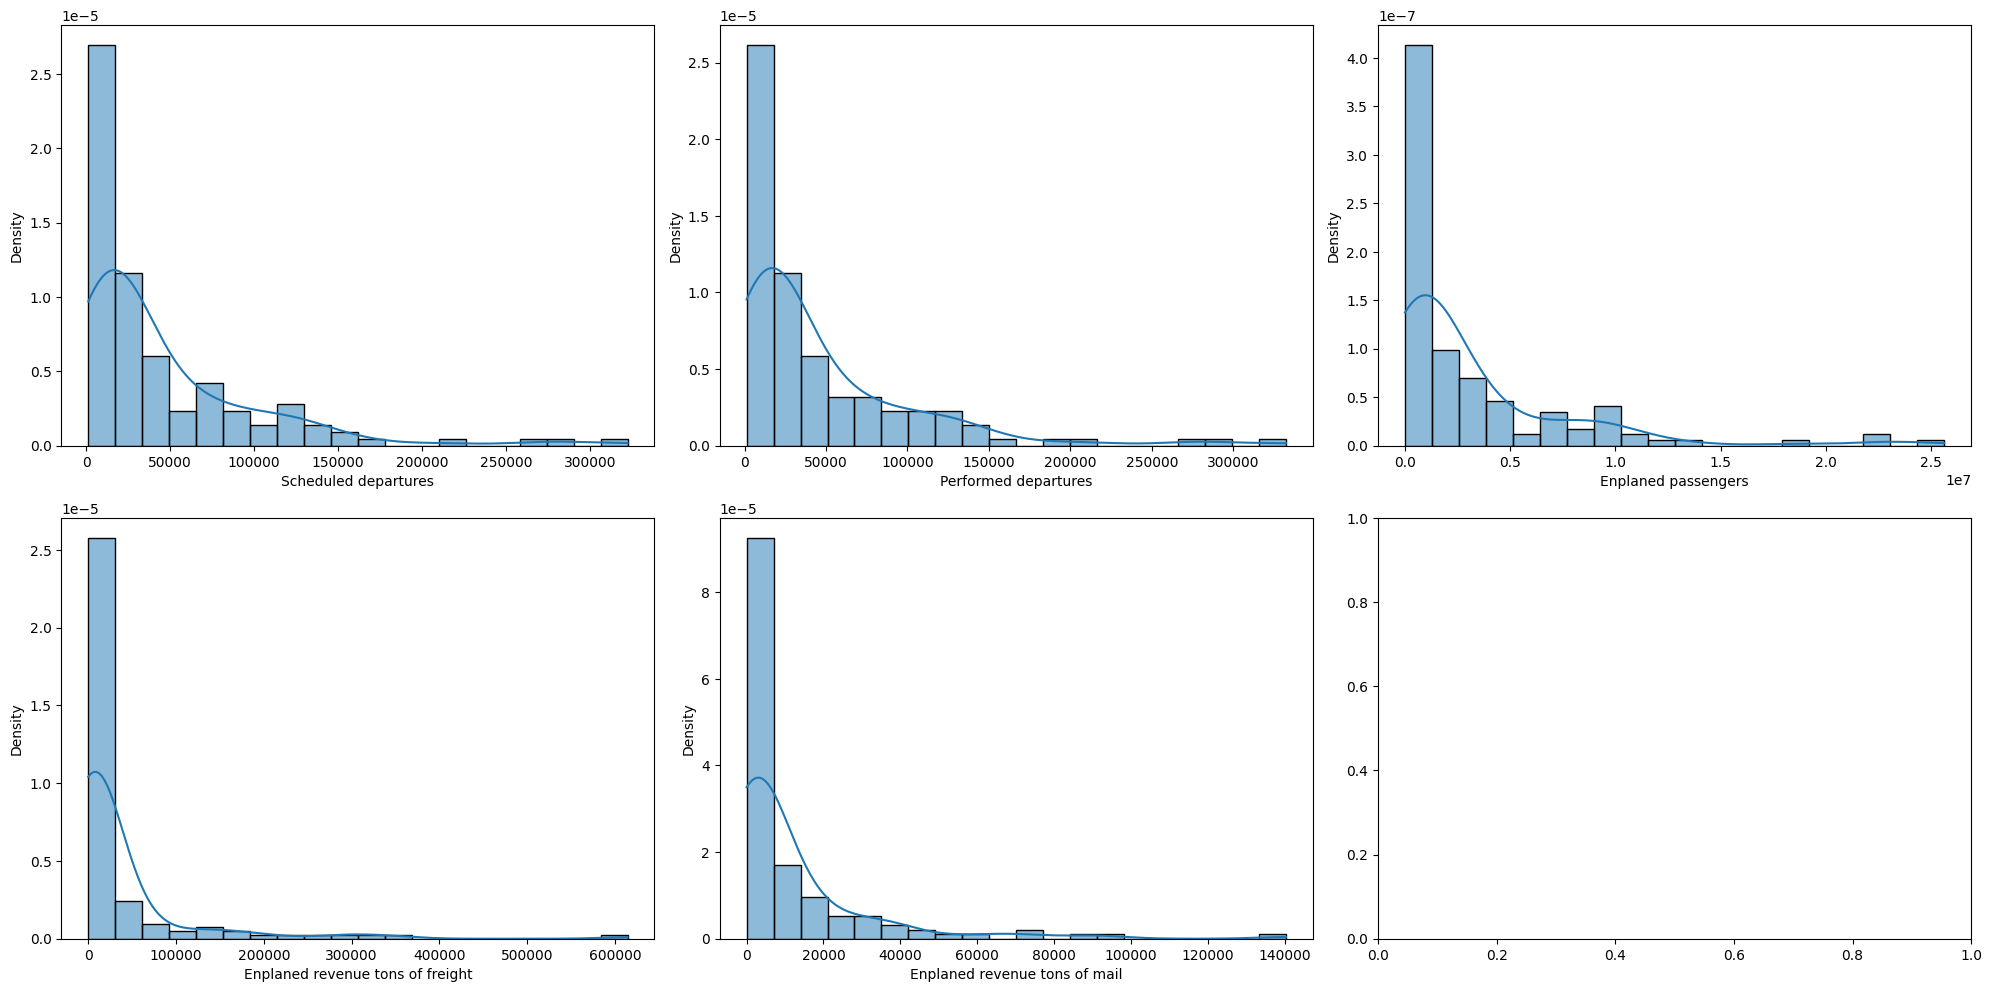

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 20

for idx, column in enumerate(df):
    ax = axes_flattened[idx]
    sns.histplot(data=df,
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.tight_layout(pad=1.0)

Из представленных графиков, можно сделать предположение, что распределение всех данных является экспоненциальным

Строих boxplots

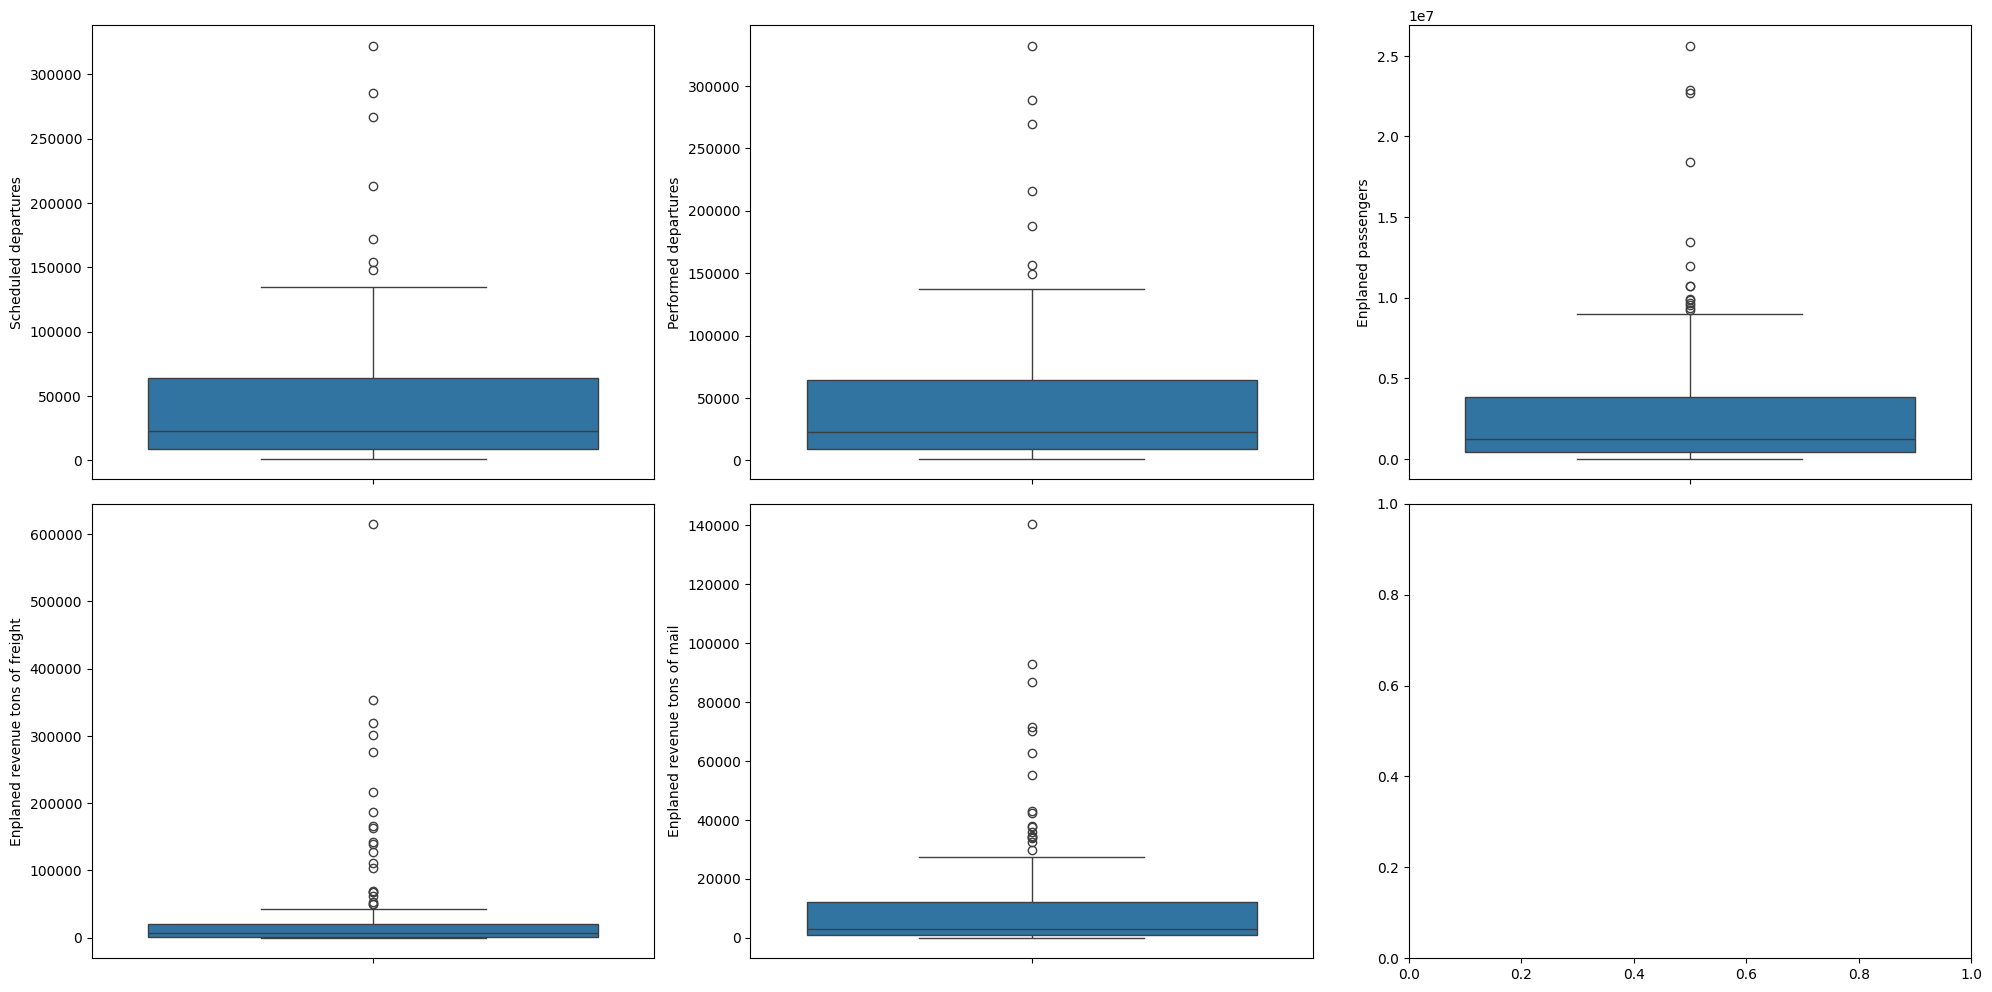

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 20

for idx, column in enumerate(df):
    ax = axes_flattened[idx]
    sns.boxplot(
        data=df,
        y=column,
        ax=ax)
fig.tight_layout(pad=1.0)

На всех графиках мы наблюдаем:
1) сильную ассиметрию
2) верхний хвост гораздо длиннее нижнего
3) Много выбросов сверху

Это связано с тем, что все данные имеют экспоненциальное распределение

Расчет описательных характеристик

In [ ]:
property_names = ["mean",
                  "var",
                  "std",
                  "median",
                  "q1",
                  "q3"
                  ]

mean = np.mean(df, axis=0)
var = np.var(df, axis=0, ddof=1)  # ddof=1 для несмещенной дисперсии (1/(n-1))
std = np.std(df, axis=0, ddof=1)
median = pd.Series(np.median(df, axis=0), index=df.columns)
q1 = pd.Series(np.percentile(df, 25, axis=0), index=df.columns)
q3 = pd.Series(np.percentile(df, 75, axis=0), index=df.columns)

pd.DataFrame([mean, var, std, median, q1, q3], index=property_names)

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
mean,4.556243e+04,4.630496e+04,3.136192e+06,3.385816e+04,1.146187e+04
var,3.179038e+09,3.306250e+09,2.104449e+13,6.526831e+09,4.203311e+08
std,5.659453e+04,5.771576e+04,4.604642e+06,8.109195e+04,2.057891e+04
median,2.286450e+04,2.302750e+04,1.210722e+06,6.195270e+03,2.919535e+03
q1,9.049000e+03,9.195000e+03,4.242468e+05,1.540135e+03,8.768825e+02
q3,6.364375e+04,6.419675e+04,3.865530e+06,2.055892e+04,1.196802e+04


Рассмотрим корреляции

<Axes: >

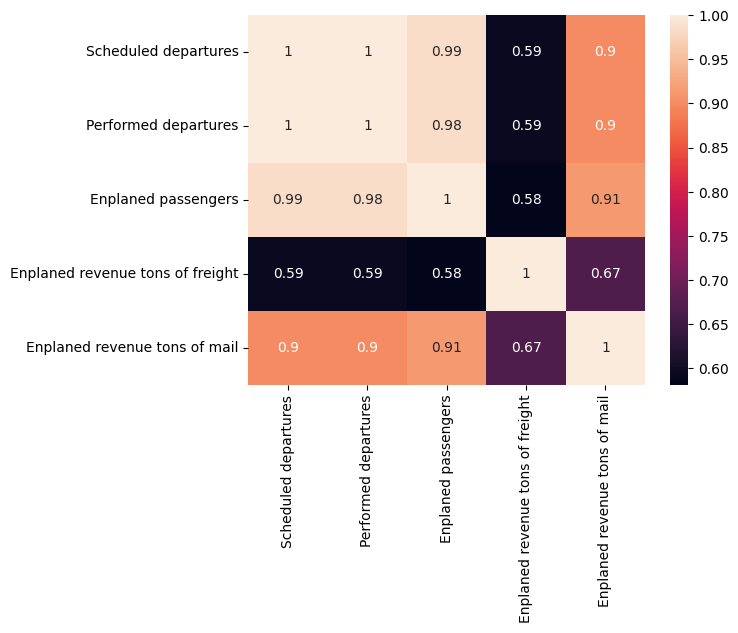

In [10]:
sns.heatmap(df.corr(), annot=True)

Из педставленного, можно сделать вывводы:
1) Все параметры между собой имеют достаточно сильную корреляцию
2) Параметр Enabled revenue tons of freight - имеет наимнее коррелированный

# Dataset "Babyboom"

In [11]:
columns = ["Birth weight in grams", "Number of minutes after midnight of each birth"]

df = load_dataset(cfg['babyroom'], columns, not_used = [0, 1])


In [12]:
df.head(10)

,Birth weight in grams,Number of minutes after midnight of each birth
0,3837.0,5.0
1,3334.0,64.0
2,3554.0,78.0
3,3838.0,115.0
4,3625.0,177.0
5,2208.0,245.0
6,1745.0,247.0
7,2846.0,262.0
8,3166.0,271.0
9,3520.0,428.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth weight in grams                           44 non-null     float64
 1   Number of minutes after midnight of each birth  44 non-null     float64
dtypes: float64(2)
memory usage: 836.0 bytes


Построение гистограмм относительных частот, учитывая длину интервалов

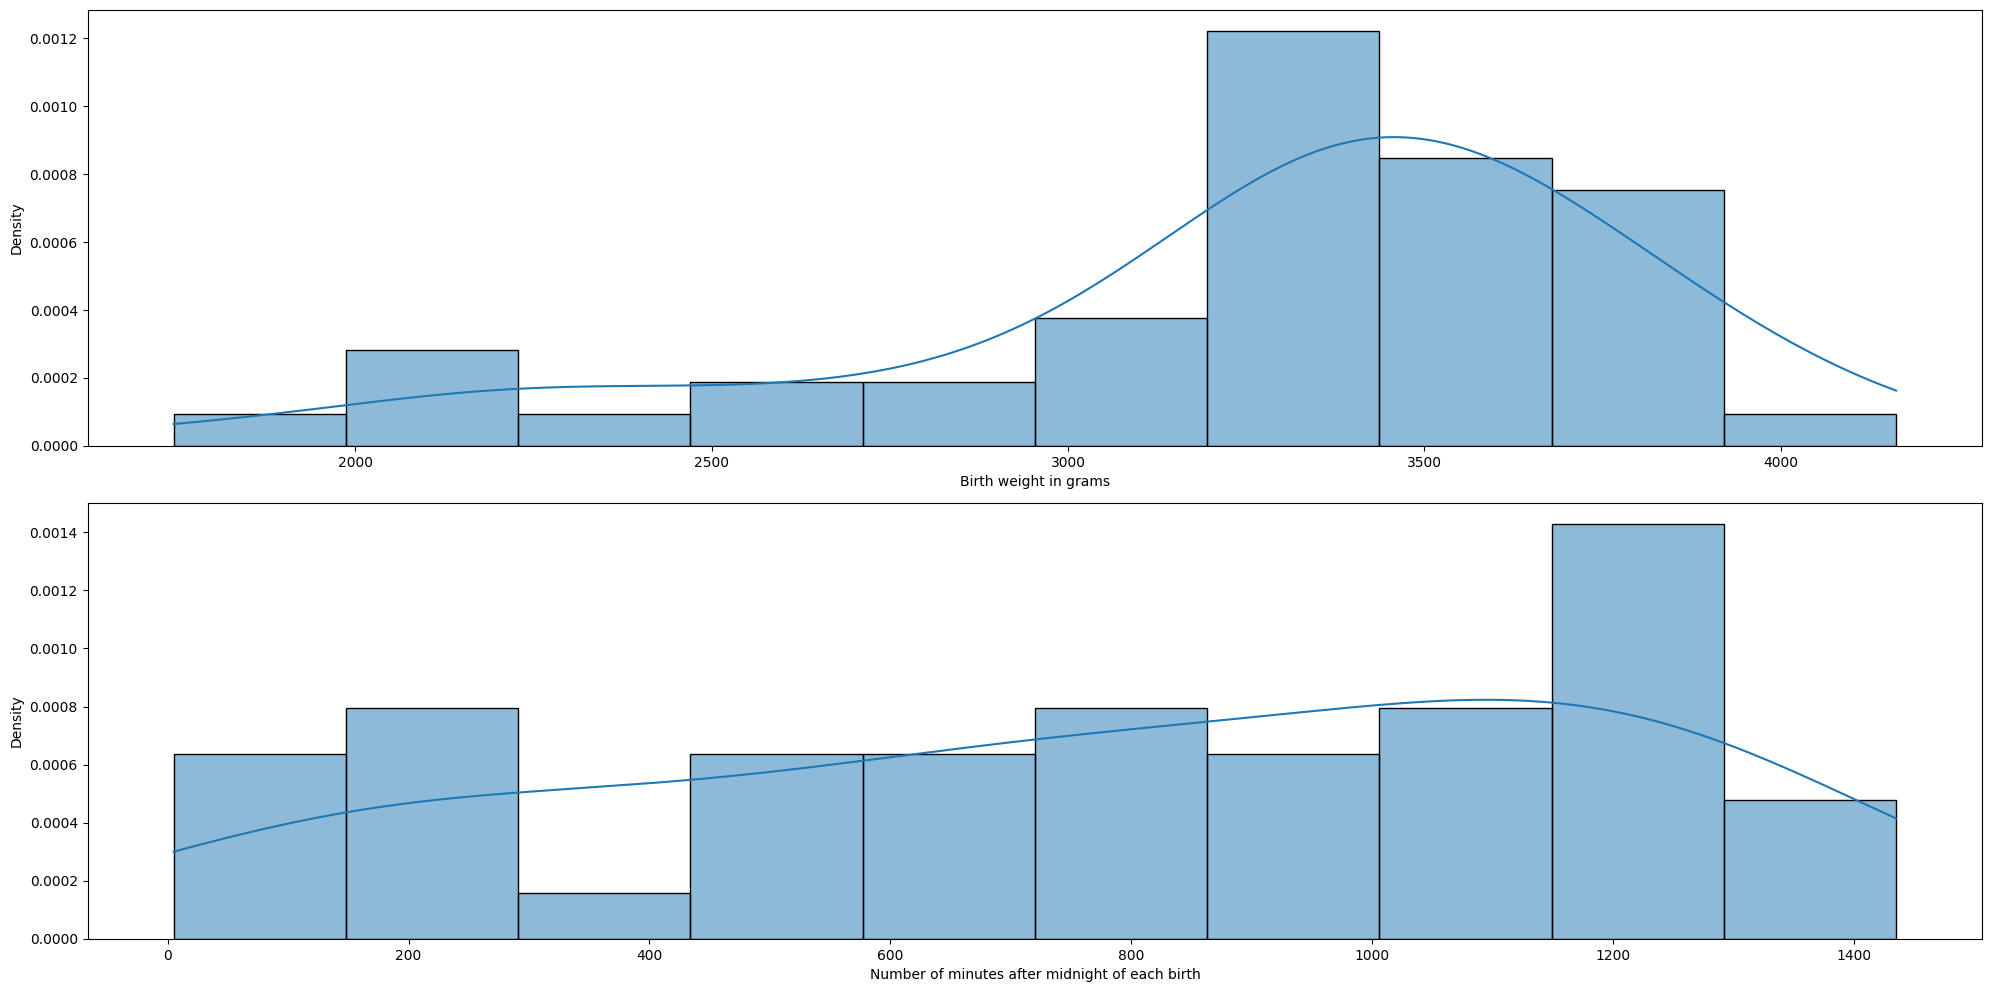

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 10

for idx, column in enumerate(df):
    ax = axes_flattened[idx]
    sns.histplot(data=df,
                 x=column,
                 bins=bins,
                 stat='density',
                 kde=True,
                 ax=ax)
fig.tight_layout(pad=1.0)

1) распределение Birth weight in grams, по предположению, соответствует логнормальному распределению
2) распределение Number of minutes after midnight of each birth, по предположению, соответствует равномерному распределению

Строим boxplots

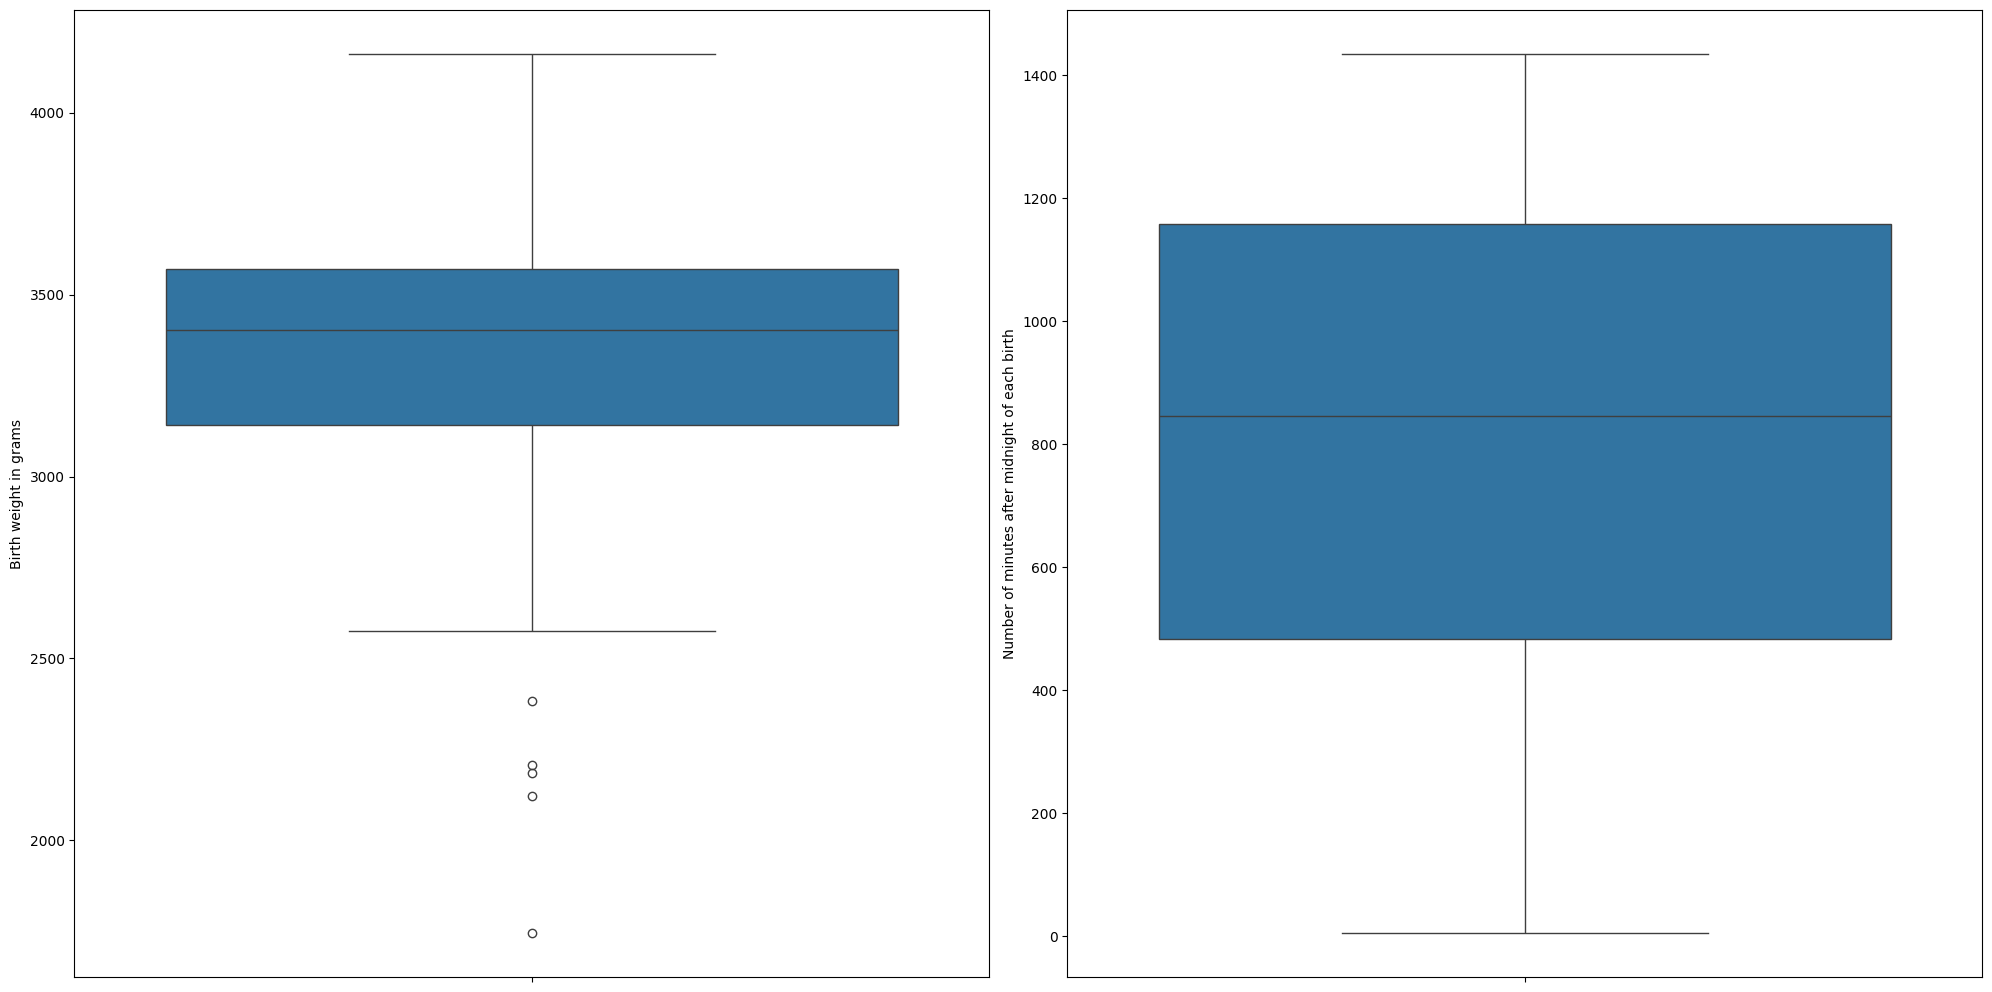

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)

bins = 20

for idx, column in enumerate(df):
    ax = axes_flattened[idx]
    sns.boxplot(
        data=df,
        y=column,
        ax=ax)
fig.tight_layout(pad=1.0)

1) Внизу есть выбросы, вверху выбросов нет, медиана смещена. Это свидетельствует о том, что распределение, скорее всего, действительно лонгнормальное
2) Медиана симметрична, выбросов нет. Из этого следует, что распределение скорее всего нормальное(равномерное)

Расчет описательных характеристик

In [16]:
property_names = ["mean",
                  "var",
                  "std",
                  "median",
                  "q1",
                  "q3"
                  ]

mean = np.mean(df, axis=0)
print(mean)
var = np.var(df, axis=0, ddof=1)  # ddof=1 для несмещенной дисперсии (1/(n-1))
std = np.std(df, axis=0, ddof=1)
median = pd.Series(np.median(df, axis=0), index=df.columns)
q1 = pd.Series(np.percentile(df, 25, axis=0), index=df.columns)
q3 = pd.Series(np.percentile(df, 75, axis=0), index=df.columns)

pd.DataFrame([mean, var, std, median, q1, q3], index=property_names)

Birth weight in grams                             3275.954545
Number of minutes after midnight of each birth     788.727273
dtype: float64


,Birth weight in grams,Number of minutes after midnight of each birth
mean,3275.954545,788.727273
var,278818.276956,173111.691332
std,528.032458,416.066931
median,3404.000000,846.500000
q1,3141.500000,482.750000
q3,3571.750000,1158.500000


<Axes: >

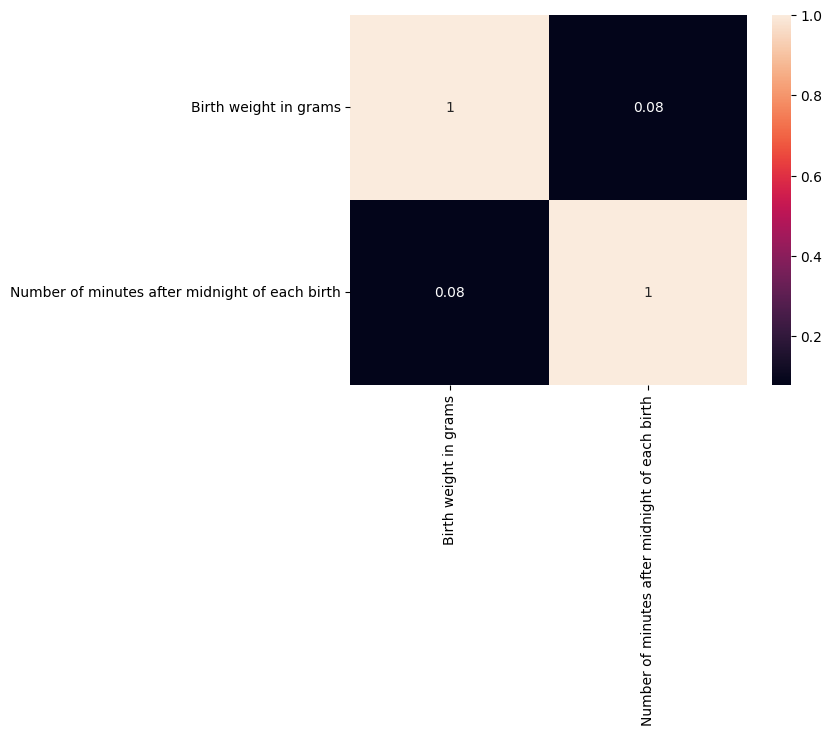

In [17]:
sns.heatmap(df.corr(), annot=True)

Из представленного можно сделать вывод, что параметры не коррелируют